In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as sk_data
import seaborn as sns

In [2]:
lotto_df = pd.read_csv('../data/lotto_numbers.csv')

In [3]:
lotto_df.sample(10)

,Date,1.N,2.N,3.N,4.N,5.N,1.S,2.S,Full_Combination
928,2013-10-08,23,24,26,33,42,3,5,23-24-26-33-42-03-05
335,2019-06-14,1,13,30,31,39,2,7,01-13-30-31-39-02-07
739,2015-07-31,16,21,34,40,50,6,9,16-21-34-40-50-06-09
653,2016-05-27,13,25,27,43,46,4,8,13-25-27-43-46-04-08
692,2016-01-12,1,2,10,30,44,1,8,01-02-10-30-44-01-08
429,2018-07-20,2,15,40,43,46,3,6,02-15-40-43-46-03-06
534,2017-07-18,1,25,27,41,45,5,7,01-25-27-41-45-05-07
154,2021-03-09,1,16,21,32,33,11,12,01-16-21-32-33-11-12
719,2015-10-09,1,40,42,43,47,9,11,01-40-42-43-47-09-11
1155,2011-08-05,13,14,18,32,34,1,10,13-14-18-32-34-01-10


In [4]:
lotto_df_corr = lotto_df.corr()

<AxesSubplot:>

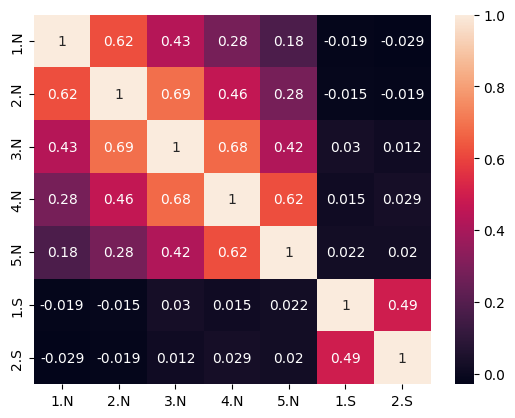

In [5]:
sns.heatmap(lotto_df_corr, annot=True)

<AxesSubplot:xlabel='1.N', ylabel='2.N'>

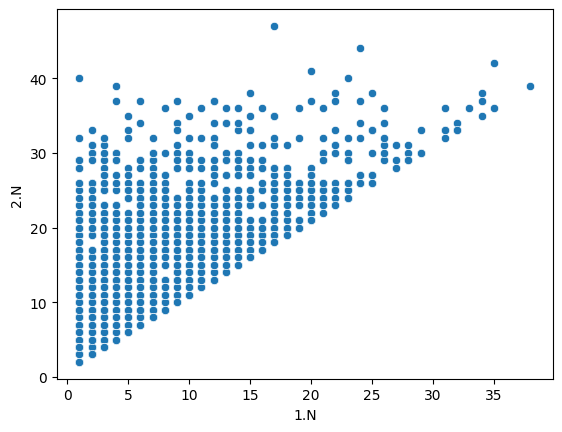

In [6]:
sns.scatterplot(data=lotto_df, x="1.N", y="2.N")

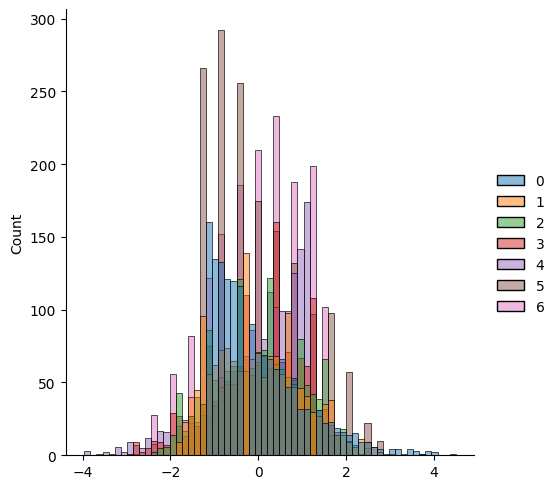

In [40]:
sns.displot(tf_df)

In [8]:
lotto_df.reindex(np.random.permutation(lotto_df.index))

,Date,1.N,2.N,3.N,4.N,5.N,1.S,2.S,Full_Combination
1076,2012-05-08,3,21,34,38,48,5,8,03-21-34-38-48-05-08
672,2016-03-22,12,15,26,42,49,5,8,12-15-26-42-49-05-08
1178,2011-05-17,20,21,37,45,46,2,3,20-21-37-45-46-02-03
494,2017-12-05,11,36,43,44,48,2,7,11-36-43-44-48-02-07
398,2018-11-06,14,24,36,40,43,2,9,14-24-36-40-43-02-09
...,...,...,...,...,...,...,...,...,...
1161,2011-07-15,6,26,33,34,39,3,4,06-26-33-34-39-03-04
730,2015-09-01,6,19,21,27,45,1,8,06-19-21-27-45-01-08
460,2018-04-03,3,8,16,40,43,5,8,03-08-16-40-43-05-08
552,2017-05-16,8,11,15,20,30,3,8,08-11-15-20-30-03-08


In [9]:
lotto_df.describe()

,1.N,2.N,3.N,4.N,5.N,1.S,2.S
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000
mean,8.332906,16.806928,25.214881,33.983964,42.546504,3.967928,7.983964
std,6.587333,8.223955,8.675176,8.432949,6.699414,2.488278,2.542148
min,1.000000,2.000000,5.000000,9.000000,16.000000,1.000000,1.000000
25%,3.000000,10.000000,19.000000,28.000000,39.000000,2.000000,6.000000
50%,6.000000,16.000000,25.000000,35.000000,44.000000,3.000000,8.000000
75%,12.000000,23.000000,32.000000,40.000000,48.000000,6.000000,10.000000
max,38.000000,47.000000,47.000000,49.000000,50.000000,11.000000,12.000000


In [10]:
lotto_df.shape

(1559, 9)

In [11]:
lotto_df["1.N"].unique()

array([ 4, 22, 19,  2, 10, 14, 18,  3,  7, 16,  6,  9, 28, 17, 12, 15,  8,
        5, 21,  1, 25, 13, 11, 20, 23, 24, 34, 26, 32, 29, 31, 27, 35, 38,
       33], dtype=int64)

In [12]:
df = lotto_df.drop(["Date", "Full_Combination"], axis = 1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler().fit(df.values)

In [15]:
tf_dataset = scaler.transform(df.values)

In [16]:
tf_df = pd.DataFrame(data=tf_dataset, index = df.index)

In [17]:
n_rows = df.shape[0] # All recorded combinations
n_columns = df.shape[1] # All possible positions for draws
window_length = 10 # Games to take into consideration

In [18]:
train = np.empty([n_rows - window_length, window_length, n_columns], dtype = float)

label = np.empty([n_rows-window_length, n_columns], dtype=float)

In [19]:
train[1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [20]:
for i in range(0, n_rows-window_length):
    train[i]=tf_df.iloc[i:i+window_length, 0: n_columns]
    label[i]=tf_df.iloc[i+window_length: i+window_length+1, 0: n_columns]

In [21]:
train.shape, label.shape

((1549, 10, 7), (1549, 7))

In [22]:
train[1]

array([[ 2.07541961,  0.75329448, -0.02477763,  0.47638429,  0.21702828,
         2.82698695,  1.58028756],
       [ 1.61985395,  1.11819953,  0.66707293,  0.59500482,  0.81428704,
        -0.79113345, -1.96116185],
       [-0.96168479, -0.94959576, -1.40847876, -1.77740569, -0.67885986,
        -0.79113345, -0.78067871],
       [ 0.25315697, -0.34142068, -0.02477763, -0.23533886, -0.52954517,
         1.21893344,  0.00631004],
       [ 0.86057785,  0.02348437,  1.01299822,  0.12052271, -0.0816011 ,
         0.81692006,  0.7932988 ],
       [ 1.46799873,  0.26675441, -0.48601134, -0.82844149,  0.66497235,
         0.41490669,  1.18679318],
       [-0.80982957,  1.48310458,  0.89768979,  0.12052271,  0.21702828,
         1.62094682,  0.7932988 ],
       [-0.20240869,  0.14511939,  0.32114765,  0.71362534,  0.81428704,
         1.62094682,  1.18679318],
       [-0.80982957,  0.75329448,  1.47423193,  1.06948692,  0.81428704,
        -0.38912007,  0.00631004],
       [-0.80982957, -1.4361

In [43]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import LSTM, Dense,Dropout
import os

batch_size = 20

In [45]:
filename = "lotto_model"

if os.path.exists('../data/'+filename+'.h5'):
    model = load_model('../data/'+filename+'.h5')
else:
    model = Sequential()
    model.add(LSTM(32,      
               input_shape=(window_length, n_columns),
               return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32,           
               return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(n_columns))
    model.compile(loss='mse', optimizer='rmsprop')
    model.fit(train, label,
          batch_size=64, epochs=10000)
    model.save('../data/'+filename+'.h5')

Epoch 1/10000
25/25 [==============================] - 2s 6ms/step - loss: 0.9957
Epoch 2/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9911
Epoch 3/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9902
Epoch 4/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9879
Epoch 5/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9879
Epoch 6/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9855
Epoch 7/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9858
Epoch 8/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9836
Epoch 9/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9841
Epoch 10/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9829
Epoch 11/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9820
Epoch 12/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.9817
Epoch 13/1000

25/25 [==============================] - 0s 5ms/step - loss: 0.8261
Epoch 100/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8316
Epoch 101/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8219
Epoch 102/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8204
Epoch 103/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8130
Epoch 104/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8125
Epoch 105/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8176
Epoch 106/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8052
Epoch 107/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8120
Epoch 108/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8113
Epoch 109/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8004
Epoch 110/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.8091
Epoch 11

25/25 [==============================] - 0s 5ms/step - loss: 0.6365
Epoch 197/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.6250
Epoch 198/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.6283
Epoch 199/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.6286
Epoch 200/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.6263
Epoch 201/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.6291
Epoch 202/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.6288
Epoch 203/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.6284
Epoch 204/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.6258
Epoch 205/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.6181
Epoch 206/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.6249
Epoch 207/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.6226
Epoch 20

25/25 [==============================] - 0s 5ms/step - loss: 0.5105
Epoch 294/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.5053
Epoch 295/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.5094
Epoch 296/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.5037
Epoch 297/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.5098
Epoch 298/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.5045
Epoch 299/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.5042
Epoch 300/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.4999
Epoch 301/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4978
Epoch 302/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.5042
Epoch 303/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.4948
Epoch 304/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.5029
Epoch 30

25/25 [==============================] - 0s 5ms/step - loss: 0.4363
Epoch 391/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4402
Epoch 392/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.4368
Epoch 393/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4427
Epoch 394/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.4375
Epoch 395/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4324
Epoch 396/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.4277
Epoch 397/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4379
Epoch 398/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4393
Epoch 399/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4282
Epoch 400/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4340
Epoch 401/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4293
Epoch 40

25/25 [==============================] - 0s 5ms/step - loss: 0.3910
Epoch 488/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3808
Epoch 489/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3897
Epoch 490/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3868
Epoch 491/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3876
Epoch 492/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3942
Epoch 493/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3930
Epoch 494/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3865
Epoch 495/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3872
Epoch 496/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3843
Epoch 497/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.3862
Epoch 498/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3922
Epoch 49

25/25 [==============================] - 0s 5ms/step - loss: 0.3577
Epoch 585/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3519
Epoch 586/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3570
Epoch 587/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3567
Epoch 588/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.3531
Epoch 589/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3576
Epoch 590/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3586
Epoch 591/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3577
Epoch 592/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3549
Epoch 593/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3527
Epoch 594/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.3546
Epoch 595/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3537
Epoch 59

25/25 [==============================] - 0s 5ms/step - loss: 0.3296
Epoch 682/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3260
Epoch 683/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3272
Epoch 684/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3331
Epoch 685/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3285
Epoch 686/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3291
Epoch 687/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3310
Epoch 688/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3332
Epoch 689/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.3334
Epoch 690/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.3348
Epoch 691/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.3265
Epoch 692/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3259
Epoch 69

25/25 [==============================] - 0s 5ms/step - loss: 0.3160
Epoch 779/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3112
Epoch 780/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.3148
Epoch 781/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3186
Epoch 782/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3176
Epoch 783/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3172
Epoch 784/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3163
Epoch 785/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3100
Epoch 786/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3081
Epoch 787/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3085
Epoch 788/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3145
Epoch 789/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3095
Epoch 79

25/25 [==============================] - 0s 4ms/step - loss: 0.2995
Epoch 876/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.3002
Epoch 877/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2998
Epoch 878/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3046
Epoch 879/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2955
Epoch 880/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2991
Epoch 881/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2978
Epoch 882/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3038
Epoch 883/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.3041
Epoch 884/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2908
Epoch 885/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3059
Epoch 886/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2936
Epoch 88

25/25 [==============================] - 0s 5ms/step - loss: 0.2860
Epoch 973/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2844
Epoch 974/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2876
Epoch 975/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2868
Epoch 976/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2881
Epoch 977/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2789
Epoch 978/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2869
Epoch 979/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2837
Epoch 980/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2877
Epoch 981/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2820
Epoch 982/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2789
Epoch 983/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2860
Epoch 98

25/25 [==============================] - 0s 5ms/step - loss: 0.2812
Epoch 1069/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2767
Epoch 1070/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2779
Epoch 1071/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2753
Epoch 1072/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2743
Epoch 1073/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2731
Epoch 1074/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2755
Epoch 1075/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2810
Epoch 1076/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2736
Epoch 1077/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2762
Epoch 1078/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2755
Epoch 1079/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.28

25/25 [==============================] - 0s 5ms/step - loss: 0.2698
Epoch 1165/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2669
Epoch 1166/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2738
Epoch 1167/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2663
Epoch 1168/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2675
Epoch 1169/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2689
Epoch 1170/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2695
Epoch 1171/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2689
Epoch 1172/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2679
Epoch 1173/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2690
Epoch 1174/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2638
Epoch 1175/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.27

25/25 [==============================] - 0s 5ms/step - loss: 0.2585
Epoch 1261/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2656
Epoch 1262/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2593
Epoch 1263/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2639
Epoch 1264/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2621
Epoch 1265/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2634
Epoch 1266/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2595
Epoch 1267/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2665
Epoch 1268/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2637
Epoch 1269/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2598
Epoch 1270/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2625
Epoch 1271/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.25

25/25 [==============================] - 0s 4ms/step - loss: 0.2540
Epoch 1357/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2548
Epoch 1358/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2530
Epoch 1359/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2525
Epoch 1360/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2550
Epoch 1361/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2544
Epoch 1362/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2493
Epoch 1363/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2573
Epoch 1364/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2564
Epoch 1365/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2555
Epoch 1366/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2541
Epoch 1367/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.24

25/25 [==============================] - 0s 4ms/step - loss: 0.2529
Epoch 1453/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2489
Epoch 1454/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2449
Epoch 1455/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2482
Epoch 1456/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2529
Epoch 1457/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2513
Epoch 1458/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2502
Epoch 1459/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2524
Epoch 1460/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2512
Epoch 1461/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2391
Epoch 1462/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2526
Epoch 1463/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.24

25/25 [==============================] - 0s 5ms/step - loss: 0.2456
Epoch 1549/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2422
Epoch 1550/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2428
Epoch 1551/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2436
Epoch 1552/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2423
Epoch 1553/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2457
Epoch 1554/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2478
Epoch 1555/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2397
Epoch 1556/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2409
Epoch 1557/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2518
Epoch 1558/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2449
Epoch 1559/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.24

25/25 [==============================] - 0s 5ms/step - loss: 0.2413
Epoch 1645/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2395
Epoch 1646/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2427
Epoch 1647/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.2400
Epoch 1648/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.2413
Epoch 1649/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.2362
Epoch 1650/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.2366
Epoch 1651/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.2423
Epoch 1652/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2396
Epoch 1653/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2424
Epoch 1654/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2390
Epoch 1655/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.24

25/25 [==============================] - 0s 5ms/step - loss: 0.2379
Epoch 1741/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2389
Epoch 1742/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2377
Epoch 1743/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2364
Epoch 1744/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2411
Epoch 1745/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2350
Epoch 1746/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2328
Epoch 1747/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2413
Epoch 1748/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2369
Epoch 1749/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2398
Epoch 1750/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2350
Epoch 1751/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.23

25/25 [==============================] - 0s 5ms/step - loss: 0.2341
Epoch 1837/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2300
Epoch 1838/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2332
Epoch 1839/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2312
Epoch 1840/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2297
Epoch 1841/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2357
Epoch 1842/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2308
Epoch 1843/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2308
Epoch 1844/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2329
Epoch 1845/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2312
Epoch 1846/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2298
Epoch 1847/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.22

25/25 [==============================] - 0s 5ms/step - loss: 0.2340
Epoch 1933/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2291
Epoch 1934/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2287
Epoch 1935/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2251
Epoch 1936/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2285
Epoch 1937/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2246
Epoch 1938/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2220
Epoch 1939/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2334
Epoch 1940/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2307
Epoch 1941/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2269
Epoch 1942/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2332
Epoch 1943/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.22

25/25 [==============================] - 0s 5ms/step - loss: 0.2237
Epoch 2029/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2227
Epoch 2030/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2239
Epoch 2031/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2288
Epoch 2032/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2286
Epoch 2033/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2287
Epoch 2034/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2207
Epoch 2035/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2325
Epoch 2036/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2280
Epoch 2037/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2316
Epoch 2038/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.2274
Epoch 2039/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.22

25/25 [==============================] - 0s 5ms/step - loss: 0.2225
Epoch 2125/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2263
Epoch 2126/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2201
Epoch 2127/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2252
Epoch 2128/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2293
Epoch 2129/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2193
Epoch 2130/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2173
Epoch 2131/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2246
Epoch 2132/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2225
Epoch 2133/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2256
Epoch 2134/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2239
Epoch 2135/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.21

25/25 [==============================] - 0s 5ms/step - loss: 0.2215
Epoch 2221/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2175
Epoch 2222/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2151
Epoch 2223/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2242
Epoch 2224/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2251
Epoch 2225/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2250
Epoch 2226/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2219
Epoch 2227/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2182
Epoch 2228/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2232
Epoch 2229/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2208
Epoch 2230/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2184
Epoch 2231/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.22

25/25 [==============================] - 0s 5ms/step - loss: 0.2127
Epoch 2317/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.2211
Epoch 2318/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2208
Epoch 2319/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2194
Epoch 2320/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2135
Epoch 2321/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2169
Epoch 2322/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2161
Epoch 2323/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2166
Epoch 2324/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2199
Epoch 2325/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2167
Epoch 2326/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2219
Epoch 2327/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.22

25/25 [==============================] - 0s 5ms/step - loss: 0.2082
Epoch 2413/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2163
Epoch 2414/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2190
Epoch 2415/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2158
Epoch 2416/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2220
Epoch 2417/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2150
Epoch 2418/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2174
Epoch 2419/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2141
Epoch 2420/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2134
Epoch 2421/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2161
Epoch 2422/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2121
Epoch 2423/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.20

25/25 [==============================] - 0s 5ms/step - loss: 0.2155
Epoch 2509/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2099
Epoch 2510/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2152
Epoch 2511/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2097
Epoch 2512/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2204
Epoch 2513/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2172
Epoch 2514/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2189
Epoch 2515/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2116
Epoch 2516/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2166
Epoch 2517/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2157
Epoch 2518/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2135
Epoch 2519/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.21

25/25 [==============================] - 0s 5ms/step - loss: 0.2139
Epoch 2605/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2089
Epoch 2606/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2070
Epoch 2607/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2176
Epoch 2608/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2149
Epoch 2609/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2165
Epoch 2610/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2144
Epoch 2611/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2103
Epoch 2612/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2119
Epoch 2613/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2110
Epoch 2614/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2146
Epoch 2615/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.21

25/25 [==============================] - 0s 5ms/step - loss: 0.2156
Epoch 2701/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2107
Epoch 2702/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2073
Epoch 2703/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2053
Epoch 2704/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2119
Epoch 2705/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2065
Epoch 2706/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2118
Epoch 2707/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2131
Epoch 2708/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2116
Epoch 2709/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2070
Epoch 2710/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2146
Epoch 2711/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.21

25/25 [==============================] - 0s 4ms/step - loss: 0.2083
Epoch 2797/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2113
Epoch 2798/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2074
Epoch 2799/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2086
Epoch 2800/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2103
Epoch 2801/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2062
Epoch 2802/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2110
Epoch 2803/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2027
Epoch 2804/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2102
Epoch 2805/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2041
Epoch 2806/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2089
Epoch 2807/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.21

25/25 [==============================] - 0s 5ms/step - loss: 0.2071
Epoch 2893/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2068
Epoch 2894/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2029
Epoch 2895/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2054
Epoch 2896/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2058
Epoch 2897/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2042
Epoch 2898/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2100
Epoch 2899/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2087
Epoch 2900/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2016
Epoch 2901/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1967
Epoch 2902/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2092
Epoch 2903/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.20

25/25 [==============================] - 0s 5ms/step - loss: 0.2074
Epoch 2989/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2064
Epoch 2990/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2057
Epoch 2991/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2037
Epoch 2992/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1999
Epoch 2993/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2031
Epoch 2994/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1990
Epoch 2995/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2057
Epoch 2996/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1994
Epoch 2997/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2073
Epoch 2998/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2005
Epoch 2999/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.20

25/25 [==============================] - 0s 5ms/step - loss: 0.1978
Epoch 3085/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2091
Epoch 3086/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1983
Epoch 3087/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2048
Epoch 3088/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1997
Epoch 3089/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2030
Epoch 3090/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2095
Epoch 3091/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2044
Epoch 3092/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1995
Epoch 3093/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2037
Epoch 3094/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2082
Epoch 3095/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.20

25/25 [==============================] - 0s 5ms/step - loss: 0.1997
Epoch 3181/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2059
Epoch 3182/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2004
Epoch 3183/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2009
Epoch 3184/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2030
Epoch 3185/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2027
Epoch 3186/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2010
Epoch 3187/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1950
Epoch 3188/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2012
Epoch 3189/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1975
Epoch 3190/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2004
Epoch 3191/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.20

25/25 [==============================] - 0s 5ms/step - loss: 0.2067
Epoch 3277/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2050
Epoch 3278/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1992
Epoch 3279/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1973
Epoch 3280/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1990
Epoch 3281/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2014
Epoch 3282/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2014
Epoch 3283/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2004
Epoch 3284/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1994
Epoch 3285/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1976
Epoch 3286/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1973
Epoch 3287/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.20

25/25 [==============================] - 0s 5ms/step - loss: 0.2028
Epoch 3373/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2021
Epoch 3374/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1960
Epoch 3375/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1980
Epoch 3376/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.2017
Epoch 3377/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1994
Epoch 3378/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2034
Epoch 3379/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2077
Epoch 3380/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1977
Epoch 3381/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1985
Epoch 3382/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1989
Epoch 3383/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.19

25/25 [==============================] - 0s 4ms/step - loss: 0.1997
Epoch 3469/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1967
Epoch 3470/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2030
Epoch 3471/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1962
Epoch 3472/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1976
Epoch 3473/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1978
Epoch 3474/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1964
Epoch 3475/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1946
Epoch 3476/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1973
Epoch 3477/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1985
Epoch 3478/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1910
Epoch 3479/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.19

25/25 [==============================] - 0s 5ms/step - loss: 0.1950
Epoch 3565/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1956
Epoch 3566/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1976
Epoch 3567/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1959
Epoch 3568/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1966
Epoch 3569/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1915
Epoch 3570/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1941
Epoch 3571/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1941
Epoch 3572/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1976
Epoch 3573/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1966
Epoch 3574/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1923
Epoch 3575/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.19

25/25 [==============================] - 0s 5ms/step - loss: 0.1953
Epoch 3661/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1998
Epoch 3662/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1955
Epoch 3663/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1917
Epoch 3664/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1953
Epoch 3665/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1938
Epoch 3666/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1938
Epoch 3667/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1921
Epoch 3668/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1963
Epoch 3669/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1922
Epoch 3670/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1926
Epoch 3671/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.19

25/25 [==============================] - 0s 5ms/step - loss: 0.1920
Epoch 3757/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1932
Epoch 3758/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1985
Epoch 3759/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1937
Epoch 3760/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1906
Epoch 3761/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1931
Epoch 3762/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1917
Epoch 3763/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1972
Epoch 3764/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1951
Epoch 3765/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1927
Epoch 3766/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1954
Epoch 3767/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.19

25/25 [==============================] - 0s 4ms/step - loss: 0.1879
Epoch 3853/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1979
Epoch 3854/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1939
Epoch 3855/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1949
Epoch 3856/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1939
Epoch 3857/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1968
Epoch 3858/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1917
Epoch 3859/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1915
Epoch 3860/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1856
Epoch 3861/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1928
Epoch 3862/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1945
Epoch 3863/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.18

25/25 [==============================] - 0s 4ms/step - loss: 0.1901
Epoch 3949/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1899
Epoch 3950/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1914
Epoch 3951/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1874
Epoch 3952/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1901
Epoch 3953/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1944
Epoch 3954/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1884
Epoch 3955/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1867
Epoch 3956/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1841
Epoch 3957/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1900
Epoch 3958/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1879
Epoch 3959/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.19

25/25 [==============================] - 0s 4ms/step - loss: 0.1879
Epoch 4045/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1872
Epoch 4046/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1858
Epoch 4047/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1871
Epoch 4048/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1919
Epoch 4049/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1903
Epoch 4050/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1912
Epoch 4051/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1905
Epoch 4052/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1897
Epoch 4053/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1834
Epoch 4054/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1915
Epoch 4055/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.19

25/25 [==============================] - 0s 5ms/step - loss: 0.1860
Epoch 4141/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1923
Epoch 4142/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1857
Epoch 4143/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1857
Epoch 4144/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1943
Epoch 4145/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1838
Epoch 4146/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1874
Epoch 4147/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1881
Epoch 4148/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1879
Epoch 4149/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1829
Epoch 4150/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1871
Epoch 4151/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.18

25/25 [==============================] - 0s 5ms/step - loss: 0.1881
Epoch 4237/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1875
Epoch 4238/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1906
Epoch 4239/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1874
Epoch 4240/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1908
Epoch 4241/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1895
Epoch 4242/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1869
Epoch 4243/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1886
Epoch 4244/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1850
Epoch 4245/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1891
Epoch 4246/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1919
Epoch 4247/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.18

25/25 [==============================] - 0s 5ms/step - loss: 0.1887
Epoch 4333/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1837
Epoch 4334/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1840
Epoch 4335/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1892
Epoch 4336/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1880
Epoch 4337/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1841
Epoch 4338/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1935
Epoch 4339/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1858
Epoch 4340/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1836
Epoch 4341/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1920
Epoch 4342/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1858
Epoch 4343/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.18

25/25 [==============================] - 0s 5ms/step - loss: 0.1856
Epoch 4429/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1865
Epoch 4430/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 4431/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1898
Epoch 4432/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1865
Epoch 4433/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1869
Epoch 4434/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1849
Epoch 4435/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1891
Epoch 4436/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1895
Epoch 4437/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1830
Epoch 4438/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1869
Epoch 4439/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.19

25/25 [==============================] - 0s 5ms/step - loss: 0.1865
Epoch 4525/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1845
Epoch 4526/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1819
Epoch 4527/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1839
Epoch 4528/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1840
Epoch 4529/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1922
Epoch 4530/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1856
Epoch 4531/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1835
Epoch 4532/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1844
Epoch 4533/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1802
Epoch 4534/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1901
Epoch 4535/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.18

25/25 [==============================] - 0s 5ms/step - loss: 0.1827
Epoch 4621/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1892
Epoch 4622/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1854
Epoch 4623/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1850
Epoch 4624/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1863
Epoch 4625/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1807
Epoch 4626/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1879
Epoch 4627/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1876
Epoch 4628/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1884
Epoch 4629/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1852
Epoch 4630/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1854
Epoch 4631/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.18

25/25 [==============================] - 0s 6ms/step - loss: 0.1877
Epoch 4717/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1861
Epoch 4718/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1816
Epoch 4719/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1899
Epoch 4720/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.1849
Epoch 4721/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1832
Epoch 4722/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.1816
Epoch 4723/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.1887
Epoch 4724/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.1794
Epoch 4725/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.1845
Epoch 4726/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1855
Epoch 4727/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.18

25/25 [==============================] - 0s 5ms/step - loss: 0.1823
Epoch 4813/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1849
Epoch 4814/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1815
Epoch 4815/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1854
Epoch 4816/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1803
Epoch 4817/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1843
Epoch 4818/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1860
Epoch 4819/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1778
Epoch 4820/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1797
Epoch 4821/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1832
Epoch 4822/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1816
Epoch 4823/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.18

25/25 [==============================] - 0s 5ms/step - loss: 0.1843
Epoch 4909/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1818
Epoch 4910/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1826
Epoch 4911/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1819
Epoch 4912/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.1843
Epoch 4913/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1849
Epoch 4914/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1784
Epoch 4915/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1819
Epoch 4916/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1815
Epoch 4917/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1820
Epoch 4918/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1798
Epoch 4919/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1824
Epoch 5005/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1793
Epoch 5006/10000
25/25 [==============================] - 0s 8ms/step - loss: 0.1835
Epoch 5007/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1790
Epoch 5008/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1811
Epoch 5009/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1800
Epoch 5010/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1810
Epoch 5011/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1843
Epoch 5012/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1779
Epoch 5013/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1813
Epoch 5014/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1844
Epoch 5015/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.18

25/25 [==============================] - 0s 5ms/step - loss: 0.1768
Epoch 5101/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1762
Epoch 5102/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1784
Epoch 5103/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1821
Epoch 5104/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1821
Epoch 5105/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1833
Epoch 5106/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1776
Epoch 5107/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1811
Epoch 5108/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1767
Epoch 5109/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1796
Epoch 5110/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1813
Epoch 5111/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1801
Epoch 5197/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 5198/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1787
Epoch 5199/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1778
Epoch 5200/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1829
Epoch 5201/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1727
Epoch 5202/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1809
Epoch 5203/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1784
Epoch 5204/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1784
Epoch 5205/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1779
Epoch 5206/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1822
Epoch 5207/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1779
Epoch 5293/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1813
Epoch 5294/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1759
Epoch 5295/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1732
Epoch 5296/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1786
Epoch 5297/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1799
Epoch 5298/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1822
Epoch 5299/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1825
Epoch 5300/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1818
Epoch 5301/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1783
Epoch 5302/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1765
Epoch 5303/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1741
Epoch 5389/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1772
Epoch 5390/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1783
Epoch 5391/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1767
Epoch 5392/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1826
Epoch 5393/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1741
Epoch 5394/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1784
Epoch 5395/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1761
Epoch 5396/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1772
Epoch 5397/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1777
Epoch 5398/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1725
Epoch 5399/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1769
Epoch 5485/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1766
Epoch 5486/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1805
Epoch 5487/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1781
Epoch 5488/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1778
Epoch 5489/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1789
Epoch 5490/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1725
Epoch 5491/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1794
Epoch 5492/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1718
Epoch 5493/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1831
Epoch 5494/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1786
Epoch 5495/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1775
Epoch 5581/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1798
Epoch 5582/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1782
Epoch 5583/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1734
Epoch 5584/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1812
Epoch 5585/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1778
Epoch 5586/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1782
Epoch 5587/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1796
Epoch 5588/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1714
Epoch 5589/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1740
Epoch 5590/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1749
Epoch 5591/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 6ms/step - loss: 0.1755
Epoch 5677/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1703
Epoch 5678/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1775
Epoch 5679/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1747
Epoch 5680/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1760
Epoch 5681/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1807
Epoch 5682/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1749
Epoch 5683/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1758
Epoch 5684/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1763
Epoch 5685/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1728
Epoch 5686/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1729
Epoch 5687/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1760
Epoch 5773/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1716
Epoch 5774/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1752
Epoch 5775/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1709
Epoch 5776/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1771
Epoch 5777/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1756
Epoch 5778/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1704
Epoch 5779/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1736
Epoch 5780/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1743
Epoch 5781/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1732
Epoch 5782/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1730
Epoch 5783/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1771
Epoch 5869/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1732
Epoch 5870/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1736
Epoch 5871/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1727
Epoch 5872/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1693
Epoch 5873/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1761
Epoch 5874/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1757
Epoch 5875/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1763
Epoch 5876/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1750
Epoch 5877/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1693
Epoch 5878/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1726
Epoch 5879/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1740
Epoch 5965/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1785
Epoch 5966/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1771
Epoch 5967/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1747
Epoch 5968/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1754
Epoch 5969/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1738
Epoch 5970/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1740
Epoch 5971/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1738
Epoch 5972/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1734
Epoch 5973/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1727
Epoch 5974/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1730
Epoch 5975/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1691
Epoch 6061/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1737
Epoch 6062/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1716
Epoch 6063/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1716
Epoch 6064/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1762
Epoch 6065/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1700
Epoch 6066/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1708
Epoch 6067/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1750
Epoch 6068/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1727
Epoch 6069/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1785
Epoch 6070/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.1720
Epoch 6071/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1687
Epoch 6157/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1731
Epoch 6158/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1731
Epoch 6159/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1730
Epoch 6160/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1738
Epoch 6161/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1719
Epoch 6162/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1674
Epoch 6163/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1710
Epoch 6164/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1677
Epoch 6165/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1690
Epoch 6166/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1769
Epoch 6167/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1682
Epoch 6253/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1717
Epoch 6254/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1713
Epoch 6255/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1694
Epoch 6256/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1723
Epoch 6257/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1687
Epoch 6258/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1755
Epoch 6259/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1681
Epoch 6260/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1703
Epoch 6261/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1779
Epoch 6262/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1727
Epoch 6263/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1703
Epoch 6349/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1738
Epoch 6350/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1699
Epoch 6351/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1686
Epoch 6352/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1696
Epoch 6353/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1721
Epoch 6354/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1725
Epoch 6355/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1667
Epoch 6356/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1712
Epoch 6357/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1738
Epoch 6358/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1675
Epoch 6359/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1745
Epoch 6445/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1700
Epoch 6446/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1738
Epoch 6447/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1700
Epoch 6448/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1722
Epoch 6449/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1694
Epoch 6450/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1687
Epoch 6451/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1744
Epoch 6452/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1665
Epoch 6453/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1689
Epoch 6454/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1716
Epoch 6455/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1660
Epoch 6541/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1650
Epoch 6542/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1729
Epoch 6543/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1718
Epoch 6544/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1706
Epoch 6545/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1713
Epoch 6546/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1695
Epoch 6547/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1657
Epoch 6548/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1684
Epoch 6549/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1736
Epoch 6550/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1711
Epoch 6551/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1689
Epoch 6637/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1718
Epoch 6638/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1675
Epoch 6639/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1668
Epoch 6640/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1701
Epoch 6641/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1687
Epoch 6642/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1697
Epoch 6643/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1690
Epoch 6644/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1728
Epoch 6645/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1704
Epoch 6646/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1699
Epoch 6647/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1679
Epoch 6733/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1704
Epoch 6734/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1686
Epoch 6735/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1674
Epoch 6736/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1698
Epoch 6737/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1660
Epoch 6738/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1711
Epoch 6739/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1715
Epoch 6740/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1639
Epoch 6741/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1694
Epoch 6742/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1714
Epoch 6743/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1684
Epoch 6829/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1722
Epoch 6830/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1687
Epoch 6831/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1700
Epoch 6832/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1705
Epoch 6833/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1697
Epoch 6834/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1708
Epoch 6835/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1651
Epoch 6836/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1673
Epoch 6837/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1694
Epoch 6838/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1691
Epoch 6839/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1673
Epoch 6925/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1715
Epoch 6926/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1616
Epoch 6927/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1655
Epoch 6928/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1703
Epoch 6929/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1674
Epoch 6930/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1662
Epoch 6931/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1678
Epoch 6932/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1635
Epoch 6933/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1692
Epoch 6934/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1657
Epoch 6935/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 6ms/step - loss: 0.1632
Epoch 7021/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1685
Epoch 7022/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1681
Epoch 7023/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1658
Epoch 7024/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1706
Epoch 7025/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1676
Epoch 7026/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1692
Epoch 7027/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1686
Epoch 7028/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1689
Epoch 7029/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1692
Epoch 7030/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1672
Epoch 7031/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1664
Epoch 7117/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1657
Epoch 7118/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1645
Epoch 7119/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1710
Epoch 7120/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1679
Epoch 7121/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1673
Epoch 7122/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1679
Epoch 7123/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1713
Epoch 7124/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1683
Epoch 7125/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1685
Epoch 7126/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1701
Epoch 7127/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1681
Epoch 7213/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1680
Epoch 7214/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1647
Epoch 7215/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1663
Epoch 7216/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1633
Epoch 7217/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1673
Epoch 7218/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1666
Epoch 7219/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1651
Epoch 7220/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1680
Epoch 7221/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1666
Epoch 7222/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1682
Epoch 7223/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1644
Epoch 7309/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1672
Epoch 7310/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1642
Epoch 7311/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1677
Epoch 7312/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1672
Epoch 7313/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1675
Epoch 7314/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1681
Epoch 7315/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1704
Epoch 7316/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1654
Epoch 7317/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1653
Epoch 7318/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1645
Epoch 7319/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.17

25/25 [==============================] - 0s 5ms/step - loss: 0.1709
Epoch 7405/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1673
Epoch 7406/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1642
Epoch 7407/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1675
Epoch 7408/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1646
Epoch 7409/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1664
Epoch 7410/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1656
Epoch 7411/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1692
Epoch 7412/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1691
Epoch 7413/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1644
Epoch 7414/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1621
Epoch 7415/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1674
Epoch 7501/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1623
Epoch 7502/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1641
Epoch 7503/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1648
Epoch 7504/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1654
Epoch 7505/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1726
Epoch 7506/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1693
Epoch 7507/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1672
Epoch 7508/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1667
Epoch 7509/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1654
Epoch 7510/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1636
Epoch 7511/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1642
Epoch 7597/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1643
Epoch 7598/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1605
Epoch 7599/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1635
Epoch 7600/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1620
Epoch 7601/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1647
Epoch 7602/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1665
Epoch 7603/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1624
Epoch 7604/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1683
Epoch 7605/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1624
Epoch 7606/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1608
Epoch 7607/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1652
Epoch 7693/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1636
Epoch 7694/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1639
Epoch 7695/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1644
Epoch 7696/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1651
Epoch 7697/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1697
Epoch 7698/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1619
Epoch 7699/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1690
Epoch 7700/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1635
Epoch 7701/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1682
Epoch 7702/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1648
Epoch 7703/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1602
Epoch 7789/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1690
Epoch 7790/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1634
Epoch 7791/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1644
Epoch 7792/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1671
Epoch 7793/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1621
Epoch 7794/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1632
Epoch 7795/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1642
Epoch 7796/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1638
Epoch 7797/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1645
Epoch 7798/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1672
Epoch 7799/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1631
Epoch 7885/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1621
Epoch 7886/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1661
Epoch 7887/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1659
Epoch 7888/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1605
Epoch 7889/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1614
Epoch 7890/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1635
Epoch 7891/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1643
Epoch 7892/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1638
Epoch 7893/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1652
Epoch 7894/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1624
Epoch 7895/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1633
Epoch 7981/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1643
Epoch 7982/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1665
Epoch 7983/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1621
Epoch 7984/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1628
Epoch 7985/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1638
Epoch 7986/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1669
Epoch 7987/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1606
Epoch 7988/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1642
Epoch 7989/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1680
Epoch 7990/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1619
Epoch 7991/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1617
Epoch 8077/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1594
Epoch 8078/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1623
Epoch 8079/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1607
Epoch 8080/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1608
Epoch 8081/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1603
Epoch 8082/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1648
Epoch 8083/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1650
Epoch 8084/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1599
Epoch 8085/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1641
Epoch 8086/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1648
Epoch 8087/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1612
Epoch 8173/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1584
Epoch 8174/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1604
Epoch 8175/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1665
Epoch 8176/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1637
Epoch 8177/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1617
Epoch 8178/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1635
Epoch 8179/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1616
Epoch 8180/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1615
Epoch 8181/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1646
Epoch 8182/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1659
Epoch 8183/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1636
Epoch 8269/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1593
Epoch 8270/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1587
Epoch 8271/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1604
Epoch 8272/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1602
Epoch 8273/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1648
Epoch 8274/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1622
Epoch 8275/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1648
Epoch 8276/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1592
Epoch 8277/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1595
Epoch 8278/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1626
Epoch 8279/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1667
Epoch 8365/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1628
Epoch 8366/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1634
Epoch 8367/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1623
Epoch 8368/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1600
Epoch 8369/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1586
Epoch 8370/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1604
Epoch 8371/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1617
Epoch 8372/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1598
Epoch 8373/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1591
Epoch 8374/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1621
Epoch 8375/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1709
Epoch 8461/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1614
Epoch 8462/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1635
Epoch 8463/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1622
Epoch 8464/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1566
Epoch 8465/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1606
Epoch 8466/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1547
Epoch 8467/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1633
Epoch 8468/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1590
Epoch 8469/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1591
Epoch 8470/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1653
Epoch 8471/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1625
Epoch 8557/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1603
Epoch 8558/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1620
Epoch 8559/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1601
Epoch 8560/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1603
Epoch 8561/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1573
Epoch 8562/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1603
Epoch 8563/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1604
Epoch 8564/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1597
Epoch 8565/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1595
Epoch 8566/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1616
Epoch 8567/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1560
Epoch 8653/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1625
Epoch 8654/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1609
Epoch 8655/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1617
Epoch 8656/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1606
Epoch 8657/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1606
Epoch 8658/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1603
Epoch 8659/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1630
Epoch 8660/10000
25/25 [==============================] - 0s 6ms/step - loss: 0.1592
Epoch 8661/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1632
Epoch 8662/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1613
Epoch 8663/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1566
Epoch 8749/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1596
Epoch 8750/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1585
Epoch 8751/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1579
Epoch 8752/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1613
Epoch 8753/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1571
Epoch 8754/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1616
Epoch 8755/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1604
Epoch 8756/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1632
Epoch 8757/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1646
Epoch 8758/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1601
Epoch 8759/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1568
Epoch 8845/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1627
Epoch 8846/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1580
Epoch 8847/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1591
Epoch 8848/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1593
Epoch 8849/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1556
Epoch 8850/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1540
Epoch 8851/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1597
Epoch 8852/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1570
Epoch 8853/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1574
Epoch 8854/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1592
Epoch 8855/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1606
Epoch 8941/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1597
Epoch 8942/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1561
Epoch 8943/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1605
Epoch 8944/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1609
Epoch 8945/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1588
Epoch 8946/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1607
Epoch 8947/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1587
Epoch 8948/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1576
Epoch 8949/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1573
Epoch 8950/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1596
Epoch 8951/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.16

25/25 [==============================] - 0s 5ms/step - loss: 0.1556
Epoch 9037/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1589
Epoch 9038/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1585
Epoch 9039/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1629
Epoch 9040/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1578
Epoch 9041/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1555
Epoch 9042/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1617
Epoch 9043/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1602
Epoch 9044/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1564
Epoch 9045/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1607
Epoch 9046/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1576
Epoch 9047/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1533
Epoch 9133/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1553
Epoch 9134/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1576
Epoch 9135/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1601
Epoch 9136/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1610
Epoch 9137/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1590
Epoch 9138/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1611
Epoch 9139/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1595
Epoch 9140/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1576
Epoch 9141/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1614
Epoch 9142/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1597
Epoch 9143/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1590
Epoch 9229/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1573
Epoch 9230/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1584
Epoch 9231/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1532
Epoch 9232/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1606
Epoch 9233/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1571
Epoch 9234/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1566
Epoch 9235/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1550
Epoch 9236/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1585
Epoch 9237/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1593
Epoch 9238/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1636
Epoch 9239/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1535
Epoch 9325/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1583
Epoch 9326/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1533
Epoch 9327/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1603
Epoch 9328/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1599
Epoch 9329/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1646
Epoch 9330/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1547
Epoch 9331/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1555
Epoch 9332/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1566
Epoch 9333/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1555
Epoch 9334/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1572
Epoch 9335/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1648
Epoch 9421/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1535
Epoch 9422/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1618
Epoch 9423/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1583
Epoch 9424/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1554
Epoch 9425/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1602
Epoch 9426/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1594
Epoch 9427/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1578
Epoch 9428/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1601
Epoch 9429/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1600
Epoch 9430/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1606
Epoch 9431/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1560
Epoch 9517/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1589
Epoch 9518/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1562
Epoch 9519/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1595
Epoch 9520/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1604
Epoch 9521/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1628
Epoch 9522/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1653
Epoch 9523/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1561
Epoch 9524/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1534
Epoch 9525/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1553
Epoch 9526/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1586
Epoch 9527/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1588
Epoch 9613/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1581
Epoch 9614/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1612
Epoch 9615/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1607
Epoch 9616/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1604
Epoch 9617/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1597
Epoch 9618/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1558
Epoch 9619/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1594
Epoch 9620/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1589
Epoch 9621/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1499
Epoch 9622/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1554
Epoch 9623/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1579
Epoch 9709/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1559
Epoch 9710/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1605
Epoch 9711/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1608
Epoch 9712/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1598
Epoch 9713/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1605
Epoch 9714/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1640
Epoch 9715/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1564
Epoch 9716/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1587
Epoch 9717/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1567
Epoch 9718/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1564
Epoch 9719/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1521
Epoch 9805/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1566
Epoch 9806/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1509
Epoch 9807/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1577
Epoch 9808/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1580
Epoch 9809/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1554
Epoch 9810/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1582
Epoch 9811/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1566
Epoch 9812/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1590
Epoch 9813/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1608
Epoch 9814/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1587
Epoch 9815/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1561
Epoch 9901/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1572
Epoch 9902/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1588
Epoch 9903/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1510
Epoch 9904/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1524
Epoch 9905/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1607
Epoch 9906/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1608
Epoch 9907/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1535
Epoch 9908/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1609
Epoch 9909/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1573
Epoch 9910/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1546
Epoch 9911/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.15

25/25 [==============================] - 0s 5ms/step - loss: 0.1601
Epoch 9997/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1573
Epoch 9998/10000
25/25 [==============================] - 0s 4ms/step - loss: 0.1607
Epoch 9999/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1572
Epoch 10000/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.1570


In [64]:
to_predict = df.iloc[:10]
#to_predict.loc[5] = [4, 6, 10, 15, 19, 1, 4]  # Introduce Last winning combination
to_predict
# [7, 12, 13, 20, 45, 3, 12]

,1.N,2.N,3.N,4.N,5.N,1.S,2.S
0,4,6,10,15,19,1,4
1,22,23,25,38,44,11,12
2,19,26,31,39,48,2,3
3,2,9,13,19,38,2,6
4,10,14,25,32,39,7,8
5,14,17,34,35,42,6,10
6,18,19,21,27,47,5,11
7,3,29,33,35,44,8,10
8,7,18,28,40,48,8,11
9,3,23,38,43,48,3,8


In [65]:
scaled_to_predict = scaler.transform(to_predict) # Scale to models metric

C:\Users\naves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [91]:
scaled_predicted_output_1 = model.predict(np.array([scaled_to_predict])) # Predict using model created
data = scaler.inverse_transform(scaled_predicted_output_1).astype(int) # Unscale to normal input
df = pd.DataFrame(data, columns=['1.N', '2.N', '3.N', '4.N', '5.N', '1.S', '2.S'])
df.to_csv('../data/lotto_prediction.csv', index=False)  # Store new predicted value
df

1/1 [==============================] - 0s 15ms/step


,1.N,2.N,3.N,4.N,5.N,1.S,2.S
0,3,6,15,24,26,1,9
